In [1]:
# Install datasets Library (if not already installed)
!pip install datasets

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [2]:
job_counts = df['job_title_short'].value_counts()

In [3]:
job_counts

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


<BarContainer object of 10 artists>

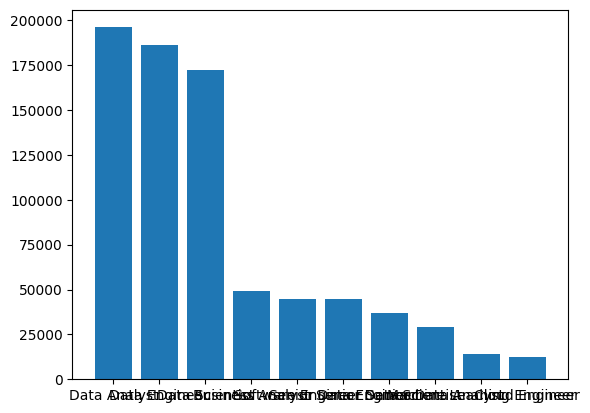

In [4]:
# Original Plot
plt.bar(job_counts.index, job_counts)

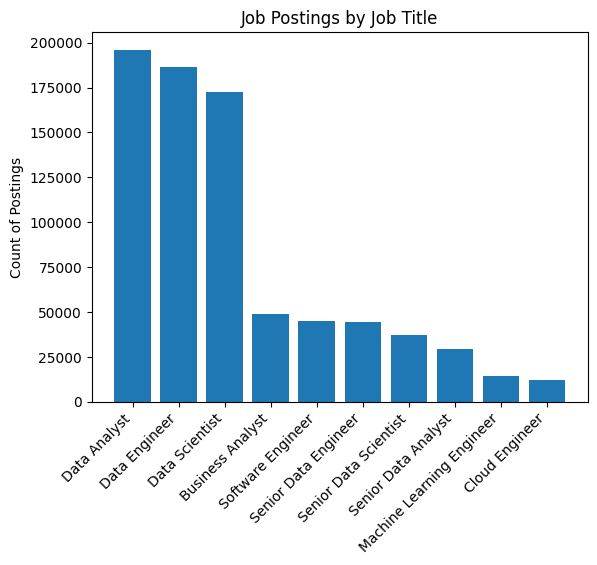

In [5]:
plt.bar(job_counts.index, job_counts)
plt.title('Postings by Job Title')
plt.ylabel('Count of Postings') # no xlabel required as I feel it's self explanatory
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
job_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values()
job_salary

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Software Engineer,99150.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Data Engineer,125000.0
Data Scientist,127500.0
Senior Data Engineer,147500.0


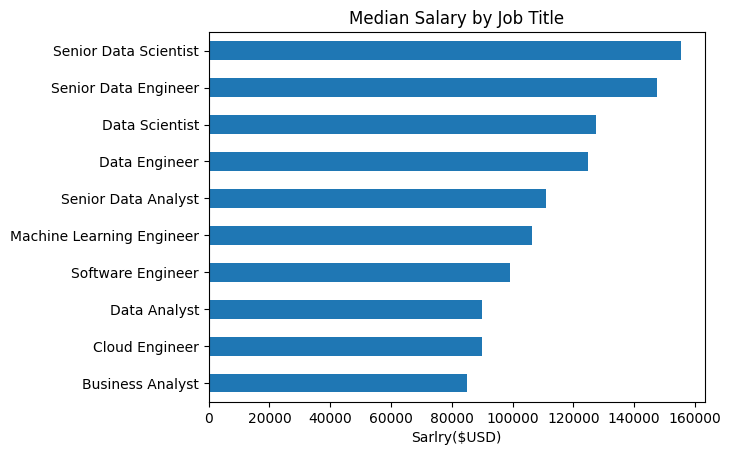

In [20]:
#Plot the shart
job_salary.plot(kind='barh')
#Customize the chart
plt.xlabel('Sarlry($USD)')
plt.ylabel('')
plt.title('Median Salary by Job Title')

#Show the bar chart
plt.show()

#Pandas_Plotting_Shortcut

<BarContainer object of 10 artists>

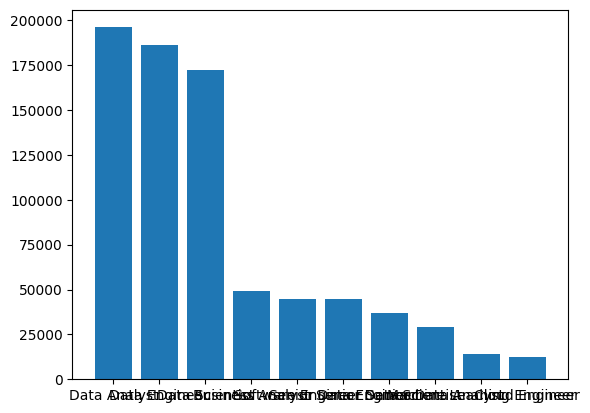

In [6]:
plt.bar(job_counts.index, job_counts)

In [7]:
#panda has series and DataFrame function called .plot

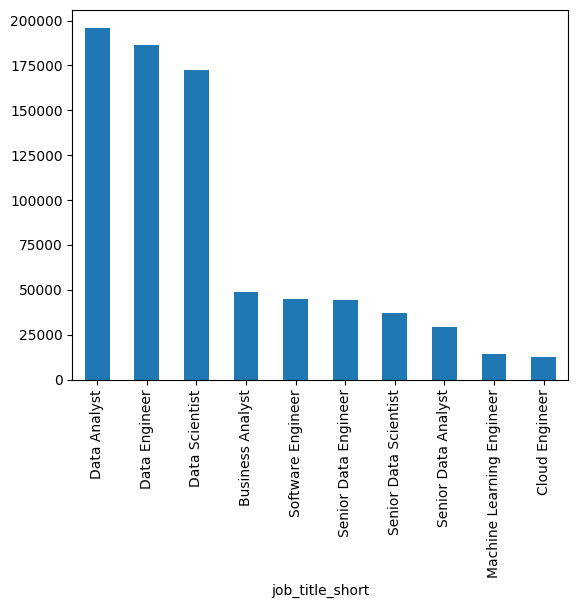

In [8]:
job_counts.plot(kind='bar')
plt.show()

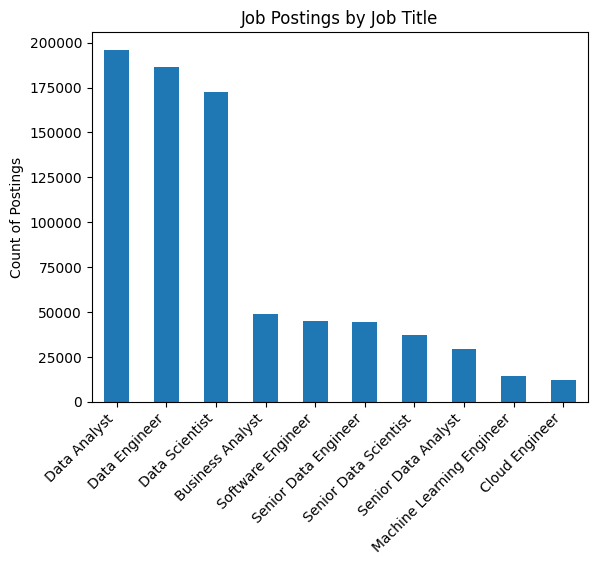

In [9]:
job_counts.plot(kind='bar')
plt.xlabel('')#Removes x-label
plt.ylabel('Count of Postings')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
#dataframe plotting. we need to prove x and y parameters. How salary trends over the years

In [11]:
df[['job_posted_date', 'salary_year_avg']].dropna(subset=['salary_year_avg'])# drops the Na values

,job_posted_date,salary_year_avg
28,2023-08-01 13:37:57,109500.0
77,2023-06-26 14:22:54,140000.0
92,2023-02-21 13:29:59,120000.0
100,2023-07-31 13:01:18,228222.0
109,2023-10-12 13:02:19,89000.0
...,...,...
785624,2023-08-31 06:02:16,139216.0
785641,2023-01-04 16:36:07,150000.0
785648,2023-04-12 06:02:51,221875.0
785682,2023-03-04 06:16:08,157500.0


<Axes: xlabel='job_posted_date'>

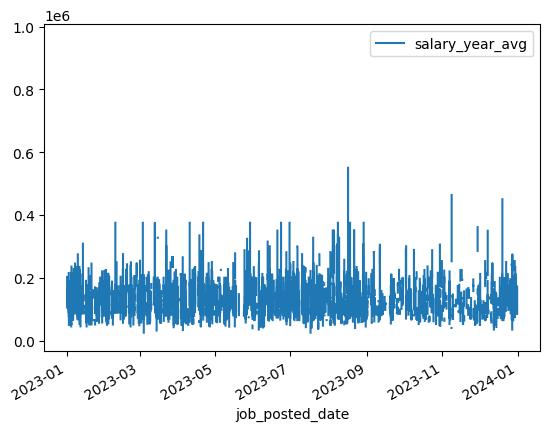

In [12]:
df.plot(x='job_posted_date', y='salary_year_avg', kind='line')#Too much noise

In [13]:
# sort index by job posted date
df = df.set_index('job_posted_date')
df.sort_index(inplace=True)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_posted_date,,,,,,,,,,,,,,,,
2023-01-01 00:00:04,Data Analyst,Data Analyst,"New York, NY",via CareerBuilder,Full-time,False,"New York, United States",False,False,United States,None,NaN,NaN,Metasys Technologies,"['sql', 'snowflake', 'visio', 'jira', 'conflue...","{'analyst_tools': ['visio'], 'async': ['jira',..."
2023-01-01 00:00:07,Data Analyst,Data Analyst,"Bloomfield, CT",via CareerBuilder,Full-time,False,"New York, United States",True,False,United States,None,NaN,NaN,Diverse Lynx,"['sql', 'sas', 'sas']","{'analyst_tools': ['sas'], 'programming': ['sq..."
2023-01-01 00:00:22,Data Analyst,Data Analyst,"Washington, DC",via CareerBuilder,Full-time,False,"New York, United States",False,True,United States,None,NaN,NaN,Guidehouse,"['sql', 'python', 'r', 'azure', 'snowflake', '...","{'analyst_tools': ['tableau', 'excel'], 'cloud..."
2023-01-01 00:00:24,Data Analyst,Data Analyst,"Fairfax, VA",via CareerBuilder,Full-time,False,"New York, United States",False,False,United States,None,NaN,NaN,Protask,"['sql', 'jira']","{'async': ['jira'], 'programming': ['sql']}"
2023-01-01 00:00:27,Senior Data Analyst,Senior Data Analyst / Platform Experience,"Worcester, MA",via LinkedIn,Full-time,False,"New York, United States",False,True,United States,None,NaN,NaN,Atria Wealth Solutions,"['sql', 'atlassian', 'jira']","{'async': ['jira'], 'other': ['atlassian'], 'p..."


<Axes: xlabel='job_posted_date'>

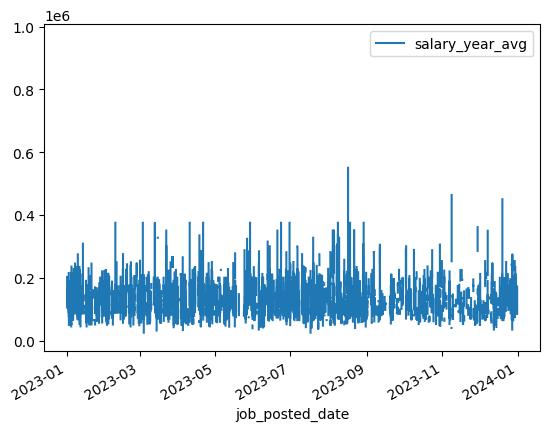

In [14]:
df.plot(y='salary_year_avg', kind='line')

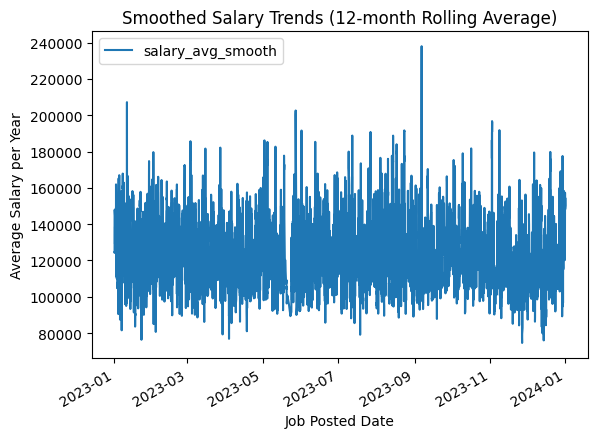

In [15]:
# Remove rows where 'salary_year_avg' is NaN
df_cleaned = df[['salary_year_avg']].dropna()

# Apply a rolling average with a window of 12 months to smooth the data
df_cleaned['salary_avg_smooth'] = df_cleaned['salary_year_avg'].rolling(window=12).mean()

# Plot the smoothed data
df_cleaned.plot(y='salary_avg_smooth', kind='line', title='Smoothed Salary Trends (12-month Rolling Average)')
plt.ylabel('Average Salary per Year')
plt.xlabel('Job Posted Date')
plt.show()

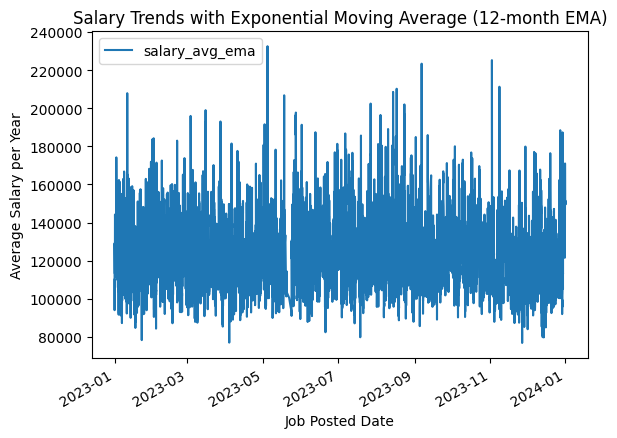

In [16]:
# Apply exponential moving average (EMA)
df_cleaned['salary_avg_ema'] = df_cleaned['salary_year_avg'].ewm(span=12, adjust=False).mean()

# Plot the EMA smoothed data
df_cleaned.plot(y='salary_avg_ema', kind='line', title='Salary Trends with Exponential Moving Average (12-month EMA)')
plt.ylabel('Average Salary per Year')
plt.xlabel('Job Posted Date')
plt.show()